In [67]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.graphics.tsaplots

In [51]:
sns.set(style='whitegrid', palette="Set2", color_codes=True)
%matplotlib inline

In [52]:
Project_Dir = os.getcwd()
Processed_Data_Dir = Project_Dir + r"/Processed_Data"

In [58]:
DATA_UNDLY=pd.read_csv(Processed_Data_Dir+'/Underlyings.csv',usecols=np.arange(1,6),parse_dates=['Date'])

In [59]:
DATA_UNDLY.shape

(4938, 5)

In [61]:
DATA_UNDLY.head()

,Date,Close,Fig,Ten_ma,pct_chg
0,2015-08-20,287.5,GASL,355.7,-0.066558
1,2015-08-21,261.5,GASL,350.3,-0.090435
2,2015-08-24,216.0,GASL,332.7,-0.173996
3,2015-08-25,205.5,GASL,316.1,-0.048611
4,2015-08-26,227.0,GASL,296.7,0.104623


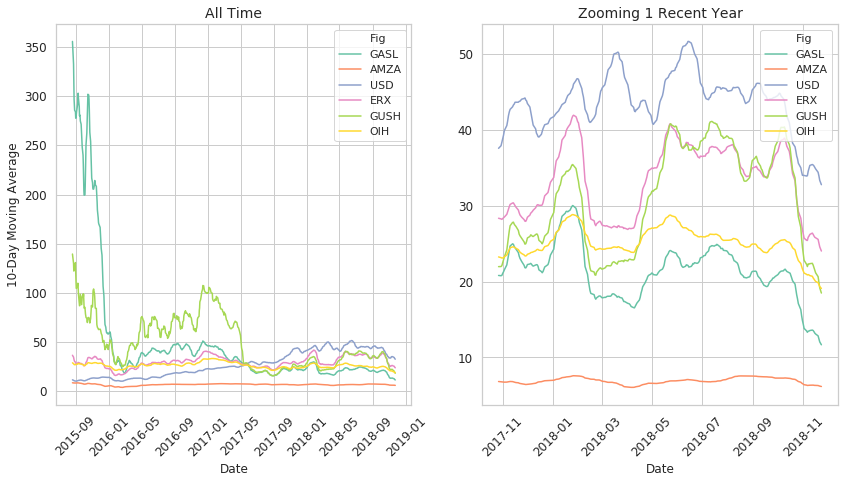

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.lineplot(data=DATA_UNDLY,hue='Fig',y='Ten_ma',x='Date',ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set(ylabel='10-Day Moving Average',title='All Time')

sns.lineplot(data=DATA_UNDLY[DATA_UNDLY.Date>"2017-10-26"],hue='Fig',y='Ten_ma',x='Date',ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set(ylabel='',title='Zooming 1 Recent Year')
for ax in ax:
    for item in ([ax.yaxis.label,ax.xaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
#     ax.set(title='Suggested Weight Adjustment For KAM\'s Features\n')
    # ax.xaxis.label.set_fontsize(13)
    ax.title.set_fontsize(14)
# plt.show()

In [63]:
dt_undly=DATA_UNDLY

* Get Rid of underlyings with low volatility

* Correlation

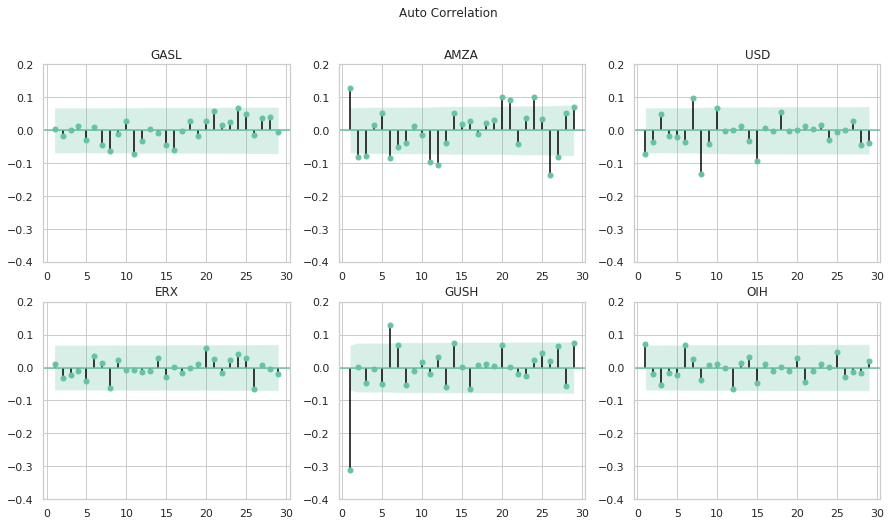

In [91]:
nrow,ncol,ax_ind=2, 3,0
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Auto Correlation')
gs1 = gridspec.GridSpec(nrow,ncol)
ax_ls = [fig.add_subplot(ss) for ss in gs1]
for fig in dt_undly.Fig.unique():
    ax=ax_ls[ax_ind]
    statsmodels.graphics.tsaplots.plot_acf(x=dt_undly[dt_undly.Fig==fig].pct_chg,unbiased=False, lags=np.arange(1,30)
                                           ,alpha=0.05,ax=ax)
    ax.set(title=fig,ylim=(-0.4,0.2))
    ax_ind+=1

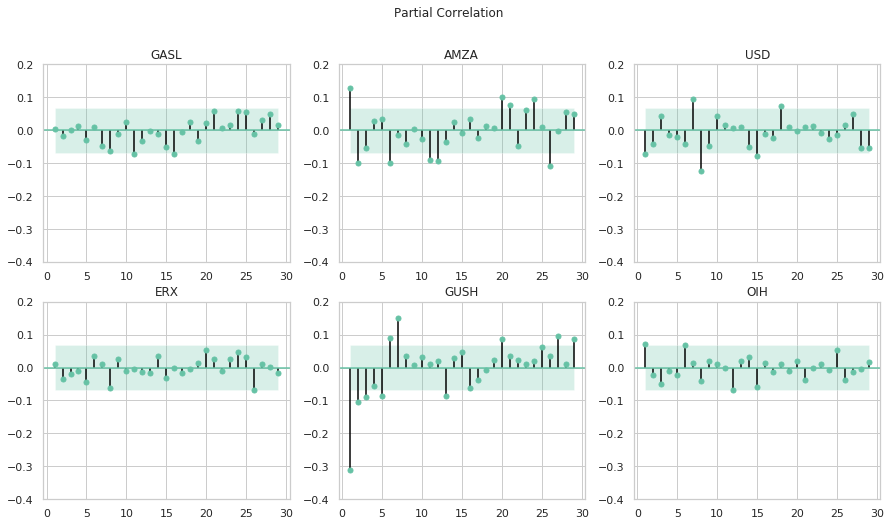

In [92]:
nrow,ncol,ax_ind=2, 3,0
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Partial Correlation')
gs1 = gridspec.GridSpec(nrow,ncol)
ax_ls = [fig.add_subplot(ss) for ss in gs1]
for fig in dt_undly.Fig.unique():
    ax=ax_ls[ax_ind]
    statsmodels.graphics.tsaplots.plot_pacf(dt_undly[dt_undly.Fig==fig].pct_chg,lags=np.arange(1,30),alpha=0.05,ax=ax)
    ax.set(title=fig,ylim=(-0.4,0.2))
    ax_ind+=1

In [8]:
data_close_pvt=data[['Date','Close','Fig']].pivot(index='Date',columns='Fig')
data_close_pvt.columns=data_close_pvt.columns.droplevel(0)

In [9]:
data_close_pvt.head().round(1)

Fig,AMZA,GASL,GUSH,HOML,NAIL,OIH
Date,,,,,,
2015-08-20,8.5,287.5,139.2,31.2,37.2,27.2
2015-08-21,8.2,261.5,125.1,30.2,35.2,26.3
2015-08-24,7.9,216.0,106.4,26.7,35.2,24.9
2015-08-25,7.9,205.5,98.2,25.0,32.7,24.9
2015-08-26,8.5,227.0,104.8,26.5,27.6,25.8


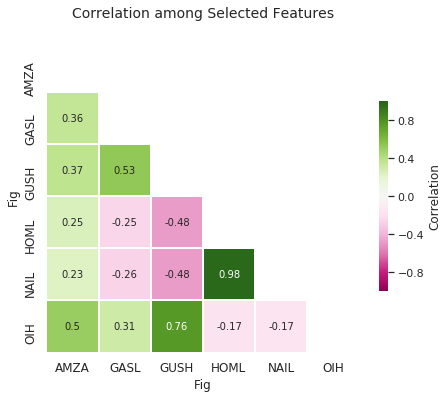

In [10]:
corr=data_close_pvt.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(7, 7))
with sns.axes_style(style='white'):
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                     square=True,
#                      xticklabels=labs_heatmap_x,
#                      yticklabels=labs_heatmap_y,
                     center=0,
                     annot=True,
                     # ax=ax,
                     cmap="PiYG",
                     linewidths=.5,
                     cbar_kws={"shrink": .5,
                               'label': 'Correlation'
                               }
                     )
for item in ([ax.yaxis.label,ax.xaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
ax.set(title='Correlation among Selected Features\n')
ax.title.set_fontsize(14)
plt.show()


In [11]:
data_chg_pvt=data[['Date','pct_chg','Fig']].pivot(index='Date',columns='Fig')
data_chg_pvt.columns=data_chg_pvt.columns.droplevel(0)

In [12]:
data_chg_pvt.head().round(3)

Fig,AMZA,GASL,GUSH,HOML,NAIL,OIH
Date,,,,,,
2015-08-20,-0.036,-0.067,-0.081,-0.044,-0.052,-0.028
2015-08-21,-0.029,-0.090,-0.102,-0.032,-0.055,-0.033
2015-08-24,-0.036,-0.174,-0.149,-0.115,0.000,-0.052
2015-08-25,-0.006,-0.049,-0.077,-0.064,-0.071,0.000
2015-08-26,0.078,0.105,0.067,0.060,-0.156,0.038


In [13]:
data_chg_pvt.describe()[1:3]

Fig,AMZA,GASL,GUSH,HOML,NAIL,OIH
mean,-0.000189,-0.001434,0.022781,0.000217,0.000495,-0.000328
std,0.023730,0.073394,0.252690,0.030317,0.041396,0.019669


In [14]:
data_close_pvt.cov()

Fig,AMZA,GASL,GUSH,HOML,NAIL,OIH
Fig,,,,,,
AMZA,0.731759,18.913427,8.721908,2.811449,3.919790,1.249996
GASL,18.913427,3807.680681,909.575396,-195.874916,-240.748777,55.520895
GUSH,8.721908,909.575396,763.512061,-172.854218,-267.229358,60.977748
HOML,2.811449,-195.874916,-172.854218,167.452579,254.453819,-6.503737
NAIL,3.919790,-240.748777,-267.229358,254.453819,397.097861,-9.786324
OIH,1.249996,55.520895,60.977748,-6.503737,-9.786324,8.468061


In [15]:
def sim_NTL(mu,cov,NTR):
    result=[]
    for n in range(NTR):    
        z_sim=np.column_stack([np.random.multivariate_normal(1+mu,cov,24),[1.0085]*24])    
        result.append(np.append(z_sim.prod(0),
                                [z_sim.prod(0).mean(),z_sim.mean(1).prod()])*100)
    return result

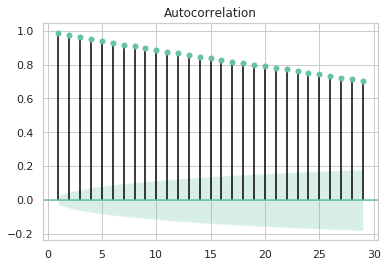

In [24]:
ax=statsmodels.graphics.tsaplots.plot_acf(x=data.Ten_ma, lags=np.arange(1,30),alpha=0.05)

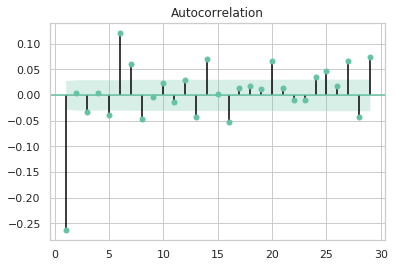

In [17]:
ax=statsmodels.graphics.tsaplots.plot_acf(x=data.pct_chg,unbiased=False, lags=np.arange(1,30),alpha=0.05)

ax=statsmodels.graphics.tsaplots.plot_pacf(x=data.pct_chg, lags=np.arange(1,30),alpha=0.05)